# **Internship Task – TechHorizon**

# **Task 2: Image Classification Using Pre-trained Models**

**Student / Intern: Ameer Hamza**

**Email: hiameerhamza@gmail.com**

**Task 2:** Image Classification Using Pre-trained Models

For this task, we use two popular pre-trained deep learning models—MobileNetV2 and ResNet50—to classify images from a dataset stored on Google Drive. Both models are trained on ImageNet, which allows them to recognize a wide variety of objects. The goal is to classify general objects in images.

# **Step 1: Mount Google Drive and Set Dataset Path**

The dataset is stored in Google Drive, so we mount it to access the images:

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# **Step 2: Load Pre-trained Models**

We use following pre-trained model:



1.   MobileNetV2 (lightweight, efficient)

In [17]:
from tensorflow.keras.applications import MobileNetV2, ResNet50, EfficientNetB0

model1 = MobileNetV2(weights="imagenet")


Both bove models are trained on ImageNet, so we don’t need to train them from scratch.

# **Step 3: Image Preprocessing**

MobileNetV2 model requires images of size 224×224 pixels and specific preprocessing:
*   **load_img** resizes the image.
*   **img_to_array** converts it to a NumPy array.
*   **np.expand_dims** adds a batch dimension required by Keras models.









In [18]:
from tensorflow.keras.preprocessing import image

def load_and_prep_img(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array


# **Step 4: Load Image Files**

We collect all image paths from the dataset folder. This allows us to iterate through images for prediction.

In [19]:
import os
dataset_path = "/content/drive/MyDrive/Datasets/TechHorizonTask2Dataset"

image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


# **Step 5: Predictions Using Both Models**

We predict the top 3 classes for the first 10 images using the models.
*   MobileNetV2 uses preprocess_mnv2 for preprocessing.
*   decode_predictions converts numerical predictions into human-readable class labels with probabilities.

In [20]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mnv2, decode_predictions as decode_mnv2
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet, decode_predictions as decode_resnet
import numpy as np
for i, img_path in enumerate(image_files[5:15]): #first 10 samples for prediction by each models
    img, img_array = load_and_prep_img(img_path)

    preds1 = model1.predict(preprocess_mnv2(img_array))
    decoded1 = decode_mnv2(preds1, top=3)[0]



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


# **Step 6: Display Predictions**

We visualize the first 10 images along with predictions from MobileNetV2 model.

*   Top 3 predicted classes with confidence percentages are displayed.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


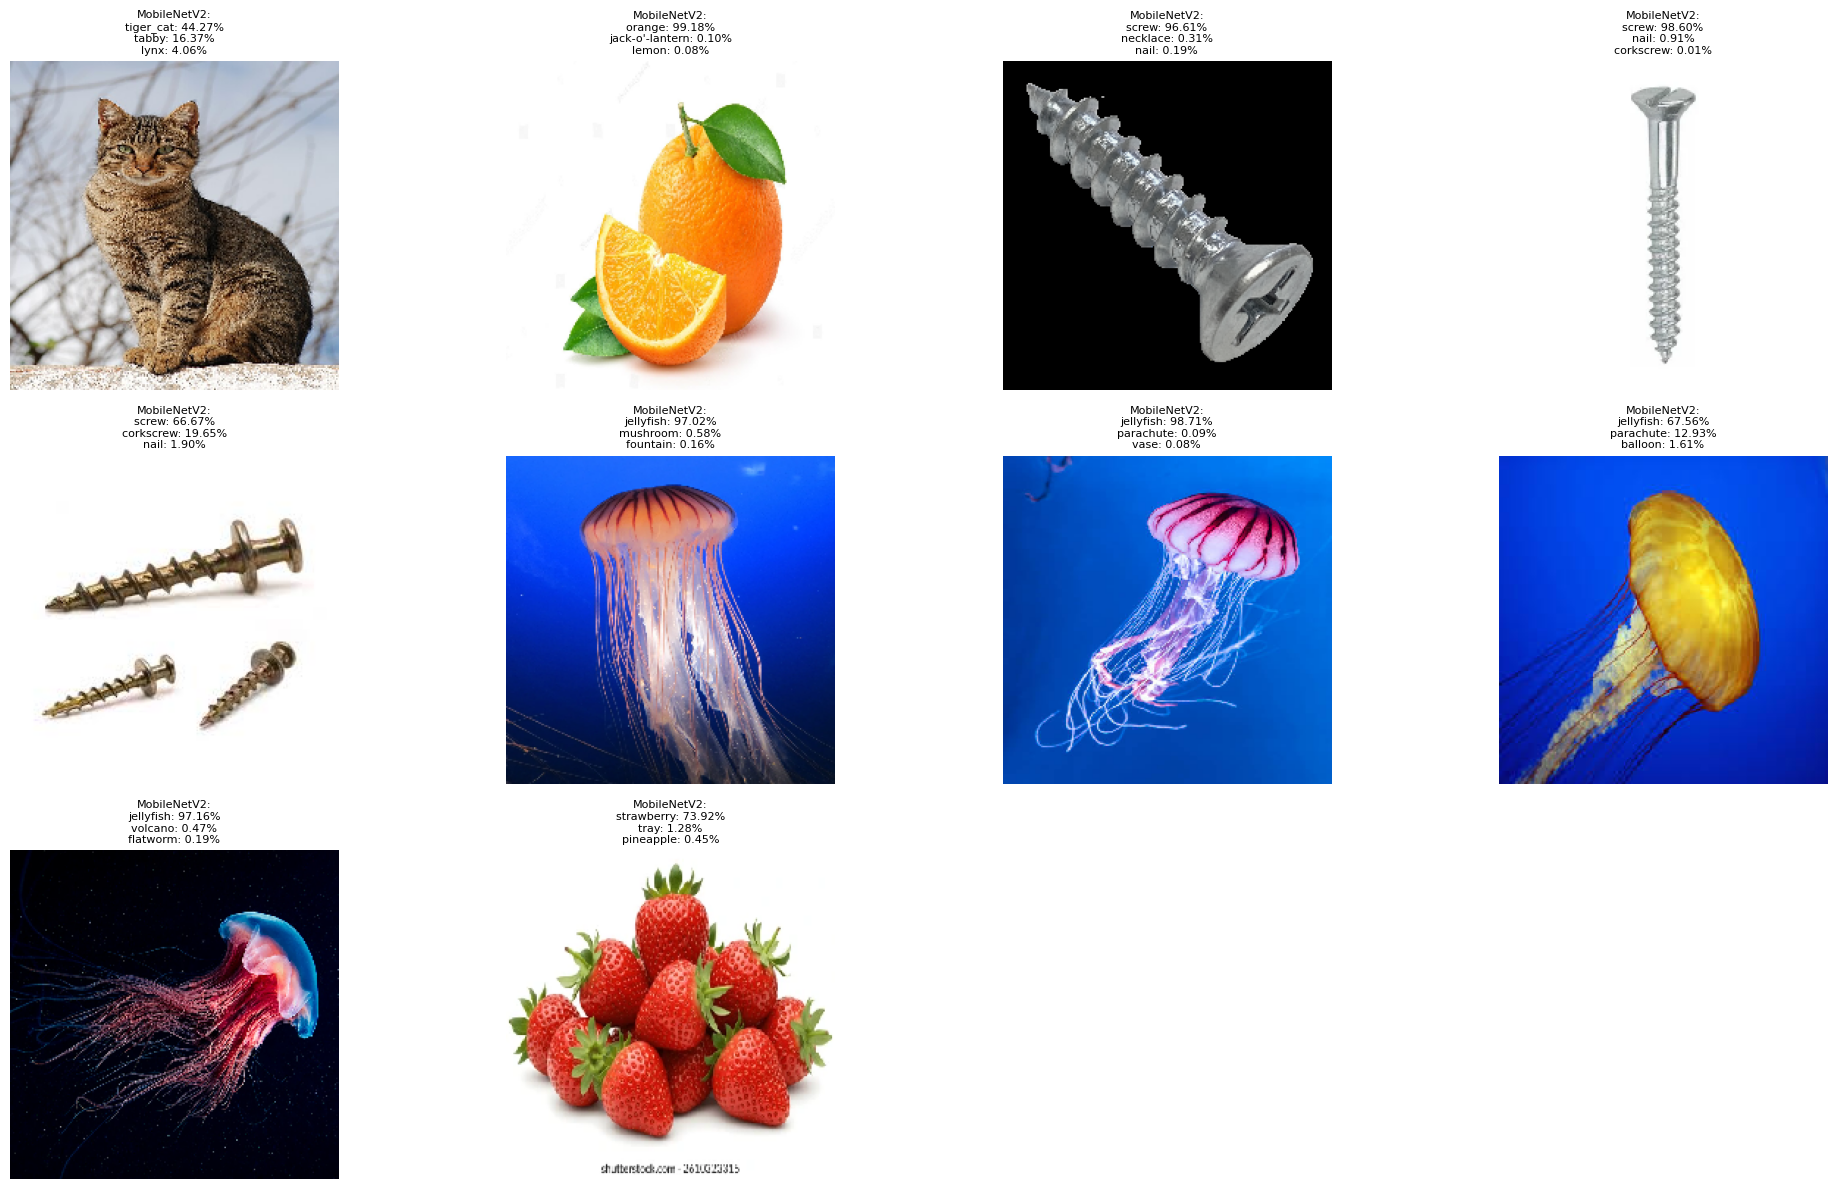

In [23]:
import matplotlib.pyplot as plt
import math

# Number of images to display
num_images = 10
cols = 4
rows = math.ceil(num_images / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, img_path in enumerate(image_files[:num_images]):
    # Load and preprocess image
    img, img_array = load_and_prep_img(img_path)

    # Predict with MobileNetV2
    preds1 = model1.predict(preprocess_mnv2(img_array))
    decoded1 = decode_mnv2(preds1, top=3)[0]

    # Show image and prediction
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("MobileNetV2:\n" + "\n".join(
        [f"{label}: {prob:.2%}" for (_, label, prob) in decoded1]
    ), fontsize=8)

plt.tight_layout()
plt.show()


In [27]:
import gradio as gr
def prep_img(img, target_size=(224, 224)):
    img = img.resize(target_size)  # Resize the PIL image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

def predict_image(img):
    img, img_array = prep_img(img)

    # Predict using MobileNetV2
    preds1 = model1.predict(preprocess_mnv2(img_array))
    decoded1 = decode_mnv2(preds1, top=3)[0]
    mob_results = "\n".join([f"{label}: {prob:.2%}" for (_, label, prob) in decoded1])

    return f"🔍 MobileNetV2 Predictions:\n{mob_results}"

# Launch Gradio interface
gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Image Classifier with MobileNetV2 & ResNet50",
    description="Upload an image to see predictions from two different pretrained models."
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://77ee0bd9991cb1f808.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
